In [10]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt
from torchvision import transforms

In [11]:
dev = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
t = transforms.ToPILImage()

In [3]:
class Generator(nn.Module):

    def __init__(self, z_dim, channels_img, features_g):
        super(Generator,self).__init__()

        self.gen = nn.Sequential(

            self._block(z_dim, features_g*16, 4, 1, 0), # 4x4
            self._block(features_g*16, features_g*8, 4, 2, 1), # 8x8
            self._block(features_g*8, features_g*4, 4, 2, 1), # 16x16
            self._block(features_g*4, features_g*2, 4, 2, 1), # 32x32

            nn.ConvTranspose2d(features_g*2, channels_img, kernel_size=4, stride=2, padding=1), # 64x64
            nn.Tanh()

        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):

        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )

    def forward(self,x):
        return self.gen(x)

In [4]:
CHANNELS_IMG = 3
Z_DIM = 100
FEATURES_G = 64

In [5]:
gen = Generator(Z_DIM, CHANNELS_IMG, FEATURES_G)
gen.load_state_dict(torch.load('models/gen123.pt', map_location=dev))
gen.to(dev)

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (4): ConvTranspose2d(128, 3, 

In [46]:
def convert_to_HWC(img):
    r,g,b = img 
    sample = torch.zeros((64,64,3))

    for i in range(sample.shape[0]):
        for i2 in range(sample.shape[1]):
            sample[i][i2][0] = r[i][i2]
            sample[i][i2][1] = g[i][i2]
            sample[i][i2][2] = b[i][i2]

    return sample.detach()

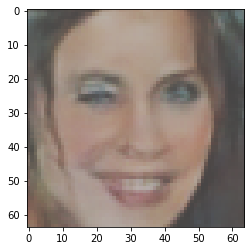

In [102]:
noise = torch.randn((1,100,1,1)).to(dev)
output = gen.forward(noise)
img = torch.sigmoid(convert_to_HWC(output[0]))
plt.imshow(img)
plt.show()